# Learning handwritten digits

In [1]:
%matplotlib inline
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
sns.set_context("poster")
sns.set_style('white', {'axes.linewidth': 0, 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0, 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0,
 'figure.figsize': (10, 6)})
plt.rcParams['figure.figsize'] = (10, 6)


data_dir = '/tmp/mnist'
mnist = input_data.read_data_sets(data_dir, one_hot=True)
train_labels = np.argmax(mnist.train.labels, axis=1)
train_images = mnist.train.images.reshape(55000, 28, 28)

def view_heatmap(image, label=""):
    """ Plots a grayscale heatmap """
    if label:
        plt.title('Label is {label}'.format(label=label))
    plt.imshow(image, cmap='gray')
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_visible(False)
    cur_axes.axes.get_yaxis().set_visible(False)from tensorflow.examples.tutorials.mnist import input_data

Extracting /tmp/mnist/train-images-idx3-ubyte.gz
Extracting /tmp/mnist/train-labels-idx1-ubyte.gz
Extracting /tmp/mnist/t10k-images-idx3-ubyte.gz
Extracting /tmp/mnist/t10k-labels-idx1-ubyte.gz


## Do you recognize this number?

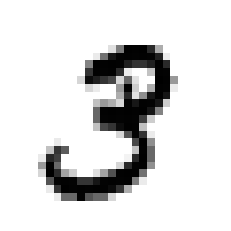

In [2]:
view_heatmap(255 - train_images[1]);

Common algorithms
* K-nearest neighbours (next lecture)
* **Multi class logistic regression**
* Fully connected neural network network
* Convolutional neural network

## Multi class logistic regression

![](img/softmax-regression-scalargraph.png)

The multi class logistic regression model generalizes logistic regression to multiple classes.  
The model hypothesis of multi class logistic regression with $C$ classes is
$$
\begin{align}
h_\theta(X) &= X \theta \,, \\
z &= X \theta + \theta_0 \,, \\ 
g_j(z) &= \frac{e^{z_j}}{\sum_{k=1}^C e^{z_k}} \,.
\end{align}
$$
This model satisfies the following constraints:
$$
\begin{align}
& 0 \leq  h_{\theta, j}(X) \leq 1 \,, \\
& \sum_{j=1}^C h_{\theta, j}(X) \leq 1 = 1\,. \\
\end{align}
$$

A suitable loss function for multi class classification, is cross entropy

$$
\begin{align}
& J(\theta) = -\sum_{i=1}^N \sum_{j=1}^C y_i \log(h_{j,\theta}(x_i) \,.
\end{align}
$$

In this tutorial we are going to implement and train this model with TensorFlow.

## Simple softmax regression
Based on tutorial [mnist for beginners](https://www.tensorflow.org/versions/r1.1/get_started/mnist/beginners) by TensorFlow.

In [4]:
# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])

# The raw formulation of cross-entropy,
#
#   tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.nn.softmax(y)),
#                                 reduction_indices=[1]))
#
# can be numerically unstable.
#
# So here we use tf.nn.softmax_cross_entropy_with_logits on the raw
# outputs of 'y', and then average across the batch.
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
# Train
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images,
                                  y_: mnist.test.labels}))

0.9214


## Tutorial tasks
- Add logging of the train and validation cross entropy
- Add L2 regularization

## Homework tasks
* Add a hidden layer (This turns the model into a neural network)
* Add reglarization to the hidden layer
* Tune the learning rate and the regularization in order to minimize the loss of the model